## xgboost使用简介：

In [1]:
# 使用xgboost库的两种方法：
#1、直接使用xgboost库自己的建模方法
# 1)读取数据:xgb.DMatrix()必须使用库自带的类读取数据
# 2)设置参数:param={}先设置参数 
# 3)训练模型:bst=xgb.train(param)
# 4)预测结果:bst.predict()得出预测结果导出，需要另外对结果评估
#2、使用xgboost库中的sklearn的API

#参数的分类：XGBoost本身的核心是基于梯度提升树实现的集成算法
#集成算法本身相关的参数
#若评估器（集成中小的分类器）相关的参数
#其他参数


#对于决策树而言，分类树：预测输入值落入叶子节点的结果，是训练时落入此节点的少数服从多数的结果
#                回归树：预测输入值落入叶子节点的结果，是训练时落入此节点的结果的均值

# 对于梯度提升回归树来说，每个样本的预测结果可以表示为所有树上结果的加权求和
#XGB作为GBDT的改进，每个样本的预测结果可以表示为所有树上结果的加权求和，所有树上的结果不是均值和多数，是一个函数结果


In [2]:
#从模块中导入类或者方法，模块可以指一个文件
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [3]:
data=load_boston()
#波士顿数据集

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
x=data.data
y=data.target

In [6]:
# 前记
# python中什么对象不能作为字典的key：有__hash__方法可以做字典的key，没有则不能作为字典的key;
# 除了list、dict、set和内部至少带有上述三种类型之一的tuple之外，其余对象均可作为字典的key；

In [7]:
x.shape

(506, 13)

In [8]:
y.shape

(506,)

In [9]:
Xtrain,Xtest,Ytrain,Ytest=TTS(x,y,test_size=0.3,random_state=420)#随机数种子

In [10]:
reg=XGBR(n_estimators=100).fit(Xtrain,Ytrain)#训练
reg.predict(Xtest)#传统接口predict

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [11]:
reg.score(Xtest,Ytest)

0.9050988968414799

In [12]:
y.mean()

22.532806324110677

In [13]:
MSE(Ytest,reg.predict(Xtest))#均方误差

8.830916343629323

In [14]:
reg.feature_importances_#树模型的优势之一：能够查看模型特征的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

In [15]:
#交叉验证可以充分使用所有的训练数据用于评估模型，（使所有折产生的分数均值最高，调节模型参数？）
reg=XGBR(n_estimators=100)#交叉验证中导入的没有经过训练的模型
cvR2=CVS(reg,Xtrain,Ytrain,cv=5)#返回的评估指标是score函数返回的指标，这里是r平方,每一折的结果
cvR2.mean()
#使用负均方误差来作为评估指标
reg=XGBR(n_estimators=100)#交叉验证中导入的没有经过训练的模型
cvn=CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()
print(cvn)

-16.215644229762717


In [16]:
#严谨和不严谨的交叉验证
#严谨的是只是用训练集来进行交叉验证
#不严谨的是使用全数据集进行交叉验证，因为怀疑它泄露信息给模型

In [17]:
#查看sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())#本质对一个字典的键排序


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 使用随机森林和线性回归进行一个对比

In [18]:
#随机森林
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.7968936380497528

In [19]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

-16.215644229762717

In [20]:
#线性回归
lr=LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278096

In [21]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648325

In [22]:
#如果开启参数verbosity,在数据巨大，预料到算法会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg=XGBR(n_estimators=10,verbosity=2)
CVS(reg,Xtrain,Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[21:31:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 

-18.633733952333067

### 查看学习曲线

In [23]:
#应该与上面无关，直接选取数据，看放在这种模型中训练和测试的 结果
#支持向量机和朴素贝叶斯的内容
def plot_learning_curve(estimator,title,x,y,
                       ax=None,#选择子图
                       ylim=None,#设置纵坐标的取值范围
                       cv=None,#交叉验证
                       n_jobs=None#设定所要使用的线程
                       ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes,train_scores,test_scores=learning_curve(estimator,x,y,
                                                       shuffle=True,
                                                        cv=cv,
                                                        random_state=420,
                                                        n_jobs=n_jobs
                                                       )
    if ax==None:
        ax=plt.gca()
    else:
        ax=plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()#绘制网格，不是必要的
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label="Training score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label="Test score")
    ax.legend(loc="best")
    return ax

In [24]:
cv = KFold(n_splits=5,shuffle=True,random_state=420)#交叉验证模式（5折，分份之前打乱）

<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

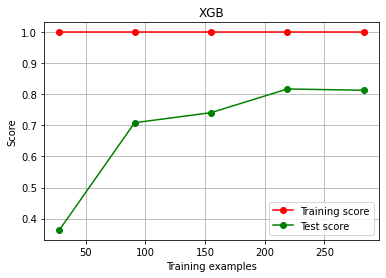

In [25]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420,verbosity=0)#静默，不显示运行进度
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)

### 使用曲线观察n_estimators对模型的影响

260 0.8131149348490775


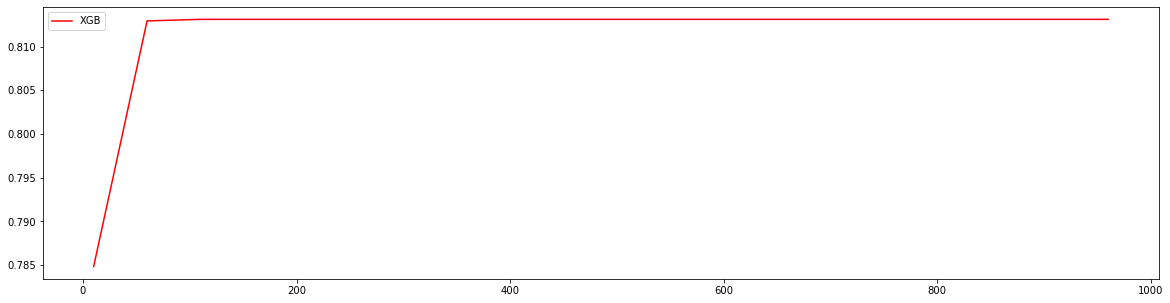

In [26]:
axisx = range(10,1010,50)
rs=[]
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

### 进化的曲线：泛化误差考虑偏差和方差

[0.8129991734412126, 0.813111116299579, 0.8131149339228717, 0.8131149337442511, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775, 0.8131149348490775]
[0.008871621645894516, 0.008858156124412863, 0.00885234840460258, 0.008852347596166613, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483, 0.008852347181932483]
[0.043840930779564184, 0.04378561097520235, 0.04377837632725519, 0.04377837558558225, 0.043778374758397035, 0.043778374758397035, 0.043778374758397035, 0.043778

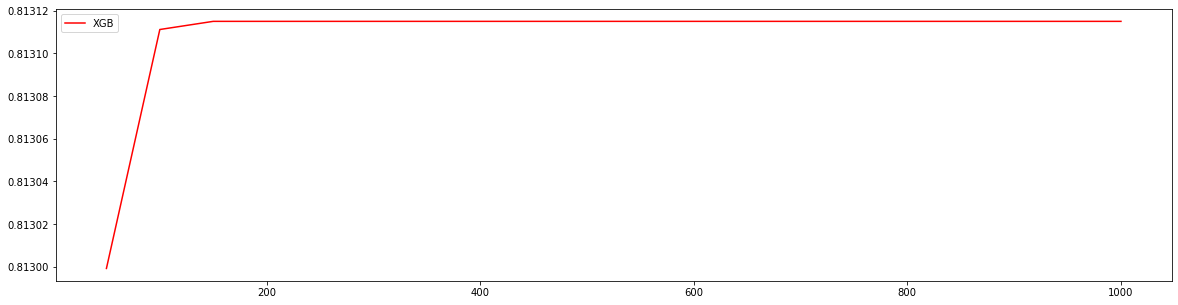

In [27]:
#以前往往取学习曲线获得分数最高的点，即考虑偏差最小的点，因为模型不稳定，方差很大的情况少见
#但数据量少模型会相对不稳定，因此考虑方差

axisx=range(50,1050,50)
rs=[]
var=[]
ge=[]
for i in axisx:
    reg=XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录准确度吧，来计算偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())#1-准确度是偏差
print(rs)
print(var)
print(ge)
#打印r2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的r2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的r2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()




240 0.8131149348490775 0.008852347181932483
240 0.8131149348490775 0.008852347181932483
240 0.8131149348490775 0.008852347181932483 0.043778374758397035


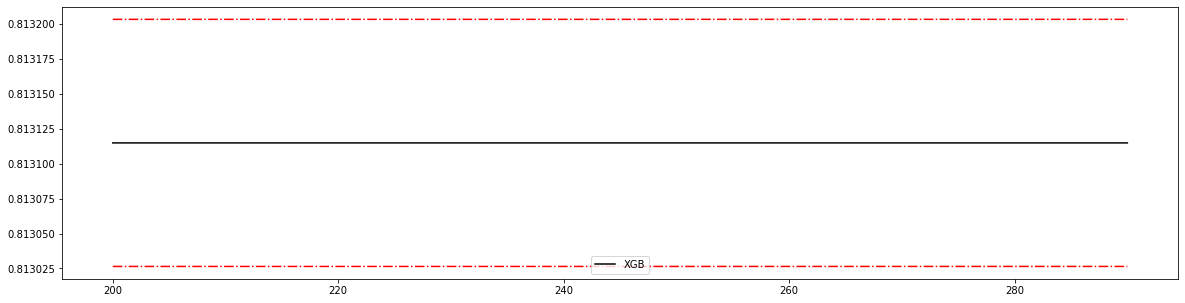

In [28]:
#以前往往取学习曲线获得分数最高的点，即考虑偏差最小的点，因为模型不稳定，方差很大的情况少见
#但数据量少模型会相对不稳定，因此考虑方差

axisx=range(200,300,10)
rs=[]
var=[]
ge=[]
for i in axisx:
    reg=XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录准确度吧，来计算偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())#1-准确度是偏差
# print(rs)
# print(var)
# print(ge)
#打印r2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的r2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的r2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs= np.array(rs)
var=np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()

In [32]:
reg = XGBR(n_estimators=240,random_state=420)
CVS(reg,Xtrain,Ytrain,cv=cv).mean()

0.8131149348490775

## 设置抽样比例参数subsample

0.7894736842105263 0.8311535529353655


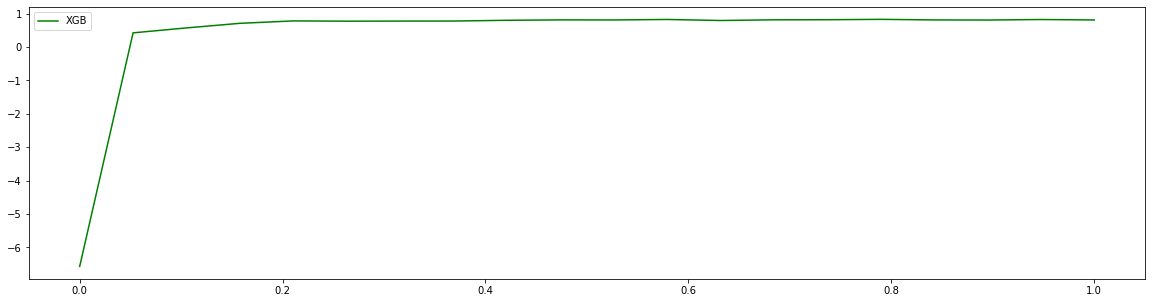

In [26]:
#如果数据比较多，上千个可以设置有放回抽样比例，数据少了可能会使效果变差


axisx = np.linspace(0,1,20)
rs=[]
for i in axisx:
    reg=XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='green',label='XGB')
plt.legend()
plt.show()

0.9210526315789473 0.8287661924765001 0.004499699130809352
0.968421052631579 0.8250932217347176 0.0019168353099589368
0.731578947368421 0.8283417804591506 0.002643126920547396 0.032109671256481835


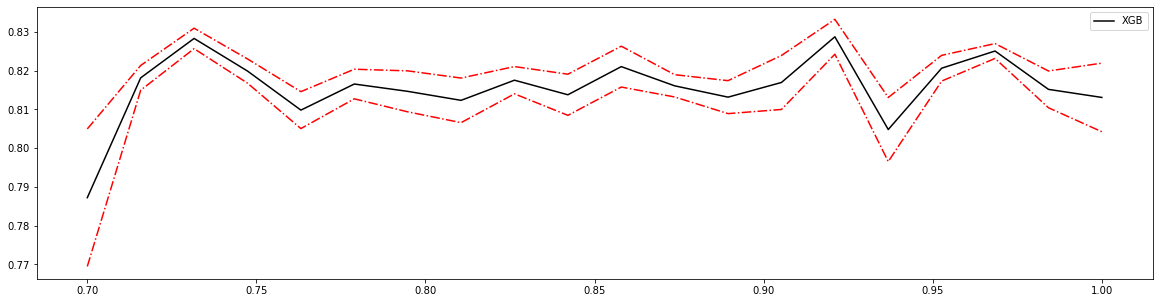

In [34]:
axisx = np.linspace(0.7,1,20)
rs=[]
var=[]
ge=[]
for i in axisx:
    reg=XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult=CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs=np.array(rs)
var=np.array(var)

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='black',label='XGB')
plt.plot(axisx,rs+var,c='red',linestyle='-.')
plt.plot(axisx,rs-var,c='red',linestyle='-.')
plt.legend()
plt.show()

## 重要参数eta，集成学习的学习率，像小步长的系数

### 每次迭代都添加一棵使效果更好的树，就像梯度下降的参数减去一个小步长

In [35]:
#在sklearn名称：learniing_rate:[0,1]取零的时候只建一棵树
#在xgboost库中：eta，默认0.3，[0,1]

In [53]:
#定义评分函数，能够直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring=["r2"],show=True):
    score=[]#存放评估分数
    for i in range(len(scoring)):#遍历每种评估方法
        if show:
            print("{}:{:.2f}".format(scoring[i]
                                    ,CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean()
                                    ))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [54]:
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0=time()
    reg=XGBR(n_estimators=100,random_state=420,learning_rate=i)
    print("learning_rate={}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate=0
r2:-6.57
neg_mean_squared_error:-567.83
00:01:578550
	
learning_rate=0.2
r2:0.83
neg_mean_squared_error:-12.79
00:02:314557
	
learning_rate=0.5
r2:0.79
neg_mean_squared_error:-14.64
00:02:007047
	
learning_rate=1
r2:0.65
neg_mean_squared_error:-24.99
00:01:445382
	


[0.8457607559396024, -11.613703037105836]
hello
[0.8483121008441683, -11.474505792484141]
hello
[0.8359096133316328, -12.23150300037418]
hello
[0.828934729300359, -12.787330816989833]
hello
[0.830032308309602, -12.924891309730736]
hello
[0.8131149337134171, -13.797196703158395]
hello
[0.8138824673603011, -13.253032605202957]
hello
[0.8187431624535713, -13.553371069806492]
hello
[0.8082512702252572, -14.069688743356224]
hello
[0.7944308655045413, -14.640465414661282]
hello
[0.8066627452148731, -14.172808378328668]
hello
[0.7804685381362675, -15.701864682436419]
hello
[0.7992219390426103, -14.59363453954111]
hello
[0.7247291413742933, -19.800960941838145]
hello
[0.7658549399985425, -17.605039120289096]
hello
[0.7526068074477901, -18.76666258801963]
hello
[0.7327422769123866, -19.626480761944237]
hello
[0.7173921036407537, -20.970626119836826]
hello
[0.7185418308164216, -21.34257950127547]
hello
0.1 0.8483121008441683


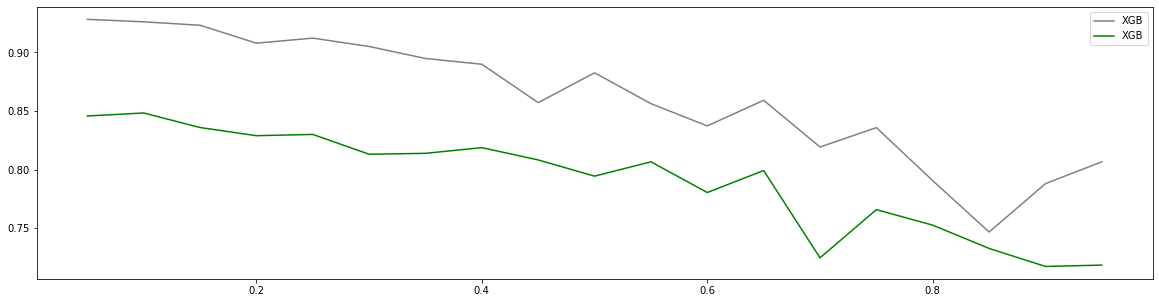

In [55]:
axisx=np.arange(0.05,1,0.05)
rs=[]
te=[]

for i in axisx:
    reg=XGBR(n_estimators=180,random_state=420,learning_rate=i)
    
    score=regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"],show=False)
    
    test=reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    print(score)
    rs.append(score[0])
    print("hello")
    te.append(test)

print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c='gray',label='XGB')
plt.plot(axisx,rs,c="green",label='XGB')
plt.legend()
plt.show()